# CALLER AND MUTATIONS COMPARISON

In [1]:
# Needed basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Importing raw data mutation tables

In [2]:
# For melanoma sample: 

columns = '#CHROM','POS','ID','REF','ALT','QUAL','FILTER','INFO','FORMAT','BLOOD','TUMOR_SAMPLE'
# Import MUTECT2 vcf files:
mel_rawm_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/sarek_results/variant_calling/mutect2/AB9767_vs_AB9766/AB9767_vs_AB9766.mutect2.vcf.gz', sep="\t", names= columns, comment = '#',  header=None)

# Import STRELKA vcf files: 
mel_rawst_snv_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/sarek_results/variant_calling/strelka/AB9767_vs_AB9766/AB9767_vs_AB9766.strelka.somatic_snvs.vcf.gz', names= columns, sep="\t", comment = '#', header=None)
mel_raw_st_ind_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/sarek_results/variant_calling/strelka/AB9767_vs_AB9766/AB9767_vs_AB9766.strelka.somatic_indels.vcf.gz', names= columns, sep="\t", comment = '#', header=None)

# Import SAGE vcf files:
mel_raw_sage_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/oncoanalyser_results/output/patient1_grp1/sage/somatic/AB9767.sage.somatic.vcf.gz', sep = "\t", names= columns, comment='#', header=None)

In [3]:
display(mel_rawm_df.head())
display(mel_raw_st_ind_df.head())
display(mel_rawst_snv_df.head())
display(mel_raw_sage_df.head())

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,16949,.,A,C,.,.,"AS_SB_TABLE=107,98|17,4;DP=234;ECNT=2;MBQ=32,2...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:195,17:0.081:212:93,7:82,9:193,17:100,95,14,3","0/1:10,4:0.301:14:4,3:5,0:10,4:7,3,3,1"
1,chr1,16996,.,T,C,.,.,"AS_SB_TABLE=149,129|21,4;DP=306;ECNT=2;MBQ=32,...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:264,21:0.075:285:132,10:120,9:264,21:136,1...","0/1:14,4:0.249:18:6,3:8,1:14,4:13,1,3,1"
2,chr1,17375,.,A,G,.,.,"AS_SB_TABLE=365,155|21,8;DP=562;ECNT=3;MBQ=32,...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:302,13:0.045:315:141,4:145,9:297,13:203,99...","0/1:218,16:0.072:234:101,8:105,8:217,16:162,56..."
3,chr1,17406,.,C,T,.,.,"AS_SB_TABLE=397,244|16,14;DP=686;ECNT=3;MBQ=30...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:346,12:0.036:358:162,3:152,9:341,12:218,12...","0/1:295,18:0.059:313:129,11:134,6:282,17:179,1..."
4,chr1,17452,.,C,T,.,.,"AS_SB_TABLE=431,357|24,30;DP=862;ECNT=3;MBQ=30...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:386,25:0.059:411:167,10:167,12:379,23:219,...","0/1:402,29:0.068:431:170,16:162,11:390,28:212,..."


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,10337,.,CCCTAA,C,.,LowEVS,IC=0;IHP=3;MQ=18.88;MQ0=634;NT=ref;QSI=9;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"169:169:53,388:2,7:122,401:170.04:80.92:0.00:0.47","176:176:45,387:7,15:117,383:163.84:78.11:0.00:..."
1,chr1,66427,.,A,AATAT,.,LowEVS,IC=2;IHP=4;MQ=47.46;MQ0=4;NT=ref;QSI=2;QSI_NT=...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"26:26:21,26:3,4:2,4:26.90:1.69:0.00:0.04","7:7:7,10:0,1:1,3:8.87:0.88:0.00:0.00"
2,chr1,591732,.,T,TAA,.,LowEVS,IC=2;IHP=18;MQ=53.96;MQ0=3;NT=ref;QSI=31;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"89:89:84,94:0,2:3,1:92.60:10.27:0.00:0.11","109:109:87,92:7,10:17,18:112.78:15.00:0.00:0.13"
3,chr1,1065206,.,GT,G,.,LowEVS,IC=0;IHP=6;MQ=54.92;MQ0=4;NT=ref;QSI=12;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"28:28:23,26:2,3:4,4:29.25:5.23:0.00:0.17","27:27:21,22:3,3:3,5:28.92:1.91:0.00:0.04"
4,chr1,1428096,.,GGAAGA,G,.,LowEVS,IC=0;IHP=8;MQ=42.33;MQ0=20;NT=ref;QSI=5;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"35:35:25,37:5,6:8,15:36.46:9.58:0.00:0.25","26:26:14,26:3,10:15,22:29.98:7.13:0.00:0.24"


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,10061,.,T,C,.,LowEVS,DP=1900;MQ=15.75;MQ0=1064;NT=ref;QSS=27;QSS_NT...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"149:31:10:0:2,26:1,9:0,9:115,861","168:45:12:0:1,37:5,25:0,15:117,705"
1,chr1,10073,.,T,A,.,LowEVS,DP=2131;MQ=15.86;MQ0=1186;NT=ref;QSS=7;QSS_NT=...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"167:36:4:0:3,62:0,2:2,16:126,921","191:44:3:0:4,56:2,11:1,13:140,795"
2,chr1,10108,.,C,T,.,LowEVS,DP=2455;MQ=15.51;MQ0=1361;NT=ref;QSS=19;QSS_NT...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"184:62:22:0:1,27:119,885:2,9:0,31","211:73:13:0:2,34:131,779:0,11:5,45"
3,chr1,10145,.,A,C,.,LowEVS,DP=2655;MQ=15.81;MQ0=1378;NT=ref;QSS=1;QSS_NT=...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"201:126:1:0:74,683:1,34:0,7:0,10","247:145:6:0:97,746:1,31:0,5:4,12"
4,chr1,10393,.,C,T,.,LowEVS,DP=1263;MQ=19.34;MQ0=505;NT=ref;QSS=1;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"163:48:20:0:0,5:110,492:0,3:5,22","145:45:13:0:1,3:90,409:1,3:8,32"


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,31047,.,C,T,105,minTumorQual,RC=GCTAC;RC_IDX=2;RC_LF=CCGTCCAGCT;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:80,0:0.00:80:2539,0:82,0:0,0,0,0,0,80,80...","./.:31:106,12:0.102:118:3292,377:108,12:11,1,0..."
1,chr1,52124,.,C,T,184,minTumorQual,RC=ATTTTTTTTTTTG;RC_IDX=8;RC_LF=TTCCCACATG;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:75,0:0.00:75:2363,0:80,0:0,0,0,0,0,75,75...","./.:31:84,10:0.106:94:2787,311:92,10:8,2,0,0,0..."
2,chr1,59074,.,C,T,254,PASS,RC=ATTTTTTG;RC_IDX=4;RC_LF=TTCATCAAGT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:69,0:0.00:69:2230,0:74,0:0,0,0,0,0,69,69...","./.:31:39,16:0.291:55:1222,502:40,16:13,3,0,0,..."
3,chr1,60739,.,G,A,223,minTumorQual,RC=TAAAT;RC_IDX=2;RC_LF=GGAGAATATC;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:67,0:0.00:67:2065,0:68,0:0,0,0,0,0,67,67...","./.:31:47,12:0.203:59:1490,408:49,13:10,2,0,0,..."
4,chr1,67287,.,A,T,62,minTumorQual,RC=CTTTTTTC;RC_IDX=4;RC_LF=TTAGACTTCT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:51,0:0.00:51:1632,0:52,0:0,0,0,0,0,51,51...","./.:31:41,2:0.047:43:1277,62:42,2:2,0,0,0,0,41..."


In [4]:
# For sarcoma-pri sample: 

# Import MUTECT2 vcf files:
sar_rawm_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/sarek_results/variant_calling/mutect2/AX4967_vs_AB9766/AX4967_vs_AB9766.mutect2.vcf.gz', names= columns, sep="\t",comment = '#', header=None)

# Import STRELKA vcf files: 
sar_rawst_snv_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/sarek_results/variant_calling/strelka/AX4967_vs_AB9766/AX4967_vs_AB9766.strelka.somatic_snvs.vcf.gz', names= columns, sep="\t", comment = '#', header=None)
sar_raw_st_ind_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/sarek_results/variant_calling/strelka/AX4967_vs_AB9766/AX4967_vs_AB9766.strelka.somatic_indels.vcf.gz', names= columns, sep="\t", comment = '#', header=None)

# Import SAGE vcf files:
sar_raw_sage_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/oncoanalyser_results/output/patient1_grp2/sage/somatic/AX4967.sage.somatic.vcf.gz', names= columns, sep = "\t", comment='#', header=None)

In [5]:
display(sar_rawm_df.head())
display(sar_raw_st_ind_df.head())
display(sar_rawst_snv_df.head())
display(sar_raw_sage_df.head())

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,14699,.,C,G,.,.,"AS_SB_TABLE=128,157|0,6;DP=296;ECNT=1;MBQ=25,3...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:218,2:0.013:220:100,0:102,2:216,2:106,112,0,2","0/1:67,4:0.071:71:33,0:30,4:64,4:22,45,0,4"
1,chr1,16125,.,T,G,.,.,"AS_SB_TABLE=190,148|17,1;DP=366;ECNT=1;MBQ=32,...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:209,11:0.053:220:88,4:106,7:208,11:115,94,...","0/1:129,7:0.058:136:63,3:46,4:126,7:75,54,7,0"
2,chr1,16534,.,C,T,.,.,"AS_SB_TABLE=89,160|1,11;DP=274;ECNT=2;MBQ=31,3...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:186,8:0.042:194:90,5:83,2:180,8:77,109,1,7","0/1:63,4:0.074:67:28,2:33,2:61,4:12,51,0,4"
3,chr1,16571,.,G,A,.,.,"AS_SB_TABLE=76,120|2,20;DP=226;ECNT=2;MBQ=31,3...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:163,18:0.105:181:78,9:67,5:159,18:67,96,2,16","0/1:33,4:0.127:37:12,1:21,2:33,4:9,24,0,4"
4,chr1,17375,.,A,G,.,.,"AS_SB_TABLE=326,144|27,9;DP=524;ECNT=3;MBQ=32,...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:302,13:0.045:315:141,4:145,9:297,13:203,99...","0/1:168,23:0.127:191:80,12:79,11:164,23:123,45..."


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,10240,.,C,CT,.,LowEVS,IC=2;IHP=3;MQ=20.52;MQ0=459;NT=ref;QSI=1;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"129:129:58,452:0,1:70,154:138.81:65.80:0.00:0.47","229:229:97,635:6,7:129,194:228.83:109.12:0.00:..."
1,chr1,10338,.,C,CG,.,LowEVS,IC=1;IHP=3;MQ=19.20;MQ0=748;NT=ref;QSI=21;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"165:165:58,435:1,5:117,363:168.00:77.98:0.00:0.46","228:228:77,481:6,19:154,517:228.30:108.32:0.00..."
2,chr1,10407,.,TA,T,.,LowEVS,IC=1;IHP=3;MQ=19.56;MQ0=550;NT=ref;QSI=11;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"157:157:46,312:4,7:110,343:149.58:55.43:0.00:0.37","185:185:54,316:5,11:123,348:180.94:63.37:0.00:..."
3,chr1,83786,.,T,TAAA,.,LowEVS,IC=11;IHP=11;MQ=51.06;MQ0=4;NT=het;QSI=3;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"78:78:39,40:37,43:5,5:76.64:11.33:0.00:0.14","80:80:57,58:12,13:9,11:75.01:7.86:0.00:0.09"
4,chr1,83905,.,GAAAGAA,G,.,LowEVS,IC=0;IHP=6;MQ=55.52;MQ0=3;NT=het;QSI=35;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"98:98:44,56:45,50:10,4:91.42:11.28:0.00:0.12","94:94:75,87:12,14:11,6:92.42:7.00:0.00:0.08"


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,10108,.,C,T,.,LowEVS,DP=3036;MQ=16.23;MQ0=1726;NT=ref;QSS=16;QSS_NT...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"185:59:22:0:1,23:123,807:2,9:0,33","336:116:39:0:1,34:206,993:0,7:13,68"
1,chr1,10229,.,A,T,.,LowEVS,DP=1467;MQ=20.12;MQ0=511;NT=ref;QSS=27;QSS_NT=...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"125:55:21:0:70,437:0,6:0,3:0,9","227:106:33:0:115,639:0,6:0,4:6,29"
2,chr1,10234,.,C,T,.,LowEVS,DP=1435;MQ=20.48;MQ0=473;NT=ref;QSS=21;QSS_NT=...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"131:63:15:0:0,10:68,429:0,7:0,7","224:114:37:0:0,17:106,607:0,6:4,29"
3,chr1,10258,.,C,G,.,LowEVS,DP=1381;MQ=20.90;MQ0=438;NT=ref;QSS=19;QSS_NT=...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"140:71:11:0:0,10:69,443:0,1:0,0","218:107:13:0:0,6:106,616:5,18:0,1"
4,chr1,10320,.,C,G,.,LowEVS,DP=1724;MQ=20.43;MQ0=674;NT=ref;QSS=4;QSS_NT=4...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"177:93:1:0:0,3:81,411:3,7:0,3","265:135:1:0:0,9:125,580:5,13:0,5"


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,55164,.,C,A,62,maxGermlineRelRawBaseQual;minTumorQual,RC=ACCCCAAAAT;RC_IDX=5;RC_LF=TCTCCATAGT;RC_NM=...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:33:122,3:0.024:125:3815,111:125,4:3,0,0,0,...","./.:32:131,6:0.044:137:4339,225:141,7:6,0,0,0,..."
1,chr1,104188,.,C,A,644,PASS,RC=TAAACACACACG;RC_IDX=2;RC_LF=CACACACACA;RC_N...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:197,0:0.00:197:6097,0:206,0:0,0,0,0,0,19...","./.:30:162,53:0.245:216:5354,1713:176,57:41,6,..."
2,chr1,187925,.,A,G,50,maxGermlineRelRawBaseQual;maxGermlineVAF;minTu...,RC=ACGCCCG;RC_IDX=2;RC_LF=AGGCAAGCTG;RC_NM=1;R...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:32:54,3:0.053:57:1811,97:57,3:3,0,0,0,0,54...","./.:29:53,13:0.197:66:1694,409:54,14:11,2,0,0,..."
3,chr1,414363,.,T,C,140,maxGermlineRelRawBaseQual;maxGermlineVAF;minTu...,RC=GGCGT;RC_IDX=2;RC_LF=TGGGATTACA;RC_NM=2;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:32:17,3:0.150:20:547,96:17,3:1,0,2,0,0,17,...","./.:31:13,18:0.581:31:403,567:13,18:11,2,5,0,0..."
4,chr1,414366,.,A,G,135,maxGermlineRelRawBaseQual;maxGermlineVAF;minTu...,RC=GTGAG;RC_IDX=2;RC_LF=GATTACAGGC;RC_NM=2;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:32:17,1:0.056:18:540,32:18,1:1,0,0,0,0,17,...","./.:31:18,15:0.455:33:563,384:18,12:11,4,0,0,0..."


In [6]:
# For sarcoma-met sample: 

# Import MUTECT2 vcf files:
l_rawm_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/sarek_results/variant_calling/mutect2/AX4941_vs_AB9766/AX4941_vs_AB9766.mutect2.vcf.gz', names= columns, sep="\t",comment = '#', header=None)

# Import STRELKA vcf files: 
l_rawst_snv_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/sarek_results/variant_calling/strelka/AX4941_vs_AB9766/AX4941_vs_AB9766.strelka.somatic_snvs.vcf.gz', names= columns, sep="\t", comment = '#', header=None)
l_raw_st_ind_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/sarek_results/variant_calling/strelka/AX4941_vs_AB9766/AX4941_vs_AB9766.strelka.somatic_indels.vcf.gz', names= columns, sep="\t", comment = '#', header=None)

# Import SAGE vcf files:
l_raw_sage_df = pd.read_csv('/workspace/projects/sjd_melos/var_call_output/oncoanalyser_results/output/patient1_grp3/sage/somatic/AX4941.sage.somatic.vcf.gz', names= columns, sep = "\t", comment='#', header=None)

In [7]:
display(l_rawm_df.head())
display(l_raw_st_ind_df.head())
display(l_rawst_snv_df.head())
display(l_raw_sage_df.head())

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,16103,.,T,G,.,.,"AS_SB_TABLE=169,160|10,1;DP=351;ECNT=2;MBQ=32,...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:199,7:0.038:206:82,3:104,4:197,7:100,99,6,1","0/1:130,4:0.038:134:54,3:52,1:125,4:69,61,4,0"
1,chr1,16125,.,T,G,.,.,"AS_SB_TABLE=189,156|16,2;DP=374;ECNT=2;MBQ=32,...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:209,11:0.053:220:88,4:106,7:208,11:115,94,...","0/1:136,7:0.051:143:55,2:55,4:131,7:74,62,6,1"
2,chr1,16288,.,C,G,.,.,"AS_SB_TABLE=149,192|24,2;DP=372;ECNT=1;MBQ=30,...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:234,22:0.086:256:110,10:110,10:230,21:111,...","0/1:107,4:0.046:111:45,4:53,0:102,4:38,69,4,0"
3,chr1,16571,.,G,A,.,.,"AS_SB_TABLE=69,112|2,20;DP=211;ECNT=1;MBQ=31,3...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:163,18:0.105:181:78,9:67,5:159,18:67,96,2,16","0/1:18,4:0.206:22:10,0:7,3:18,4:2,16,0,4"
4,chr1,17375,.,A,G,.,.,"AS_SB_TABLE=312,132|27,10;DP=490;ECNT=3;MBQ=32...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:302,13:0.045:315:141,4:145,9:297,13:203,99...","0/1:142,24:0.155:166:71,10:58,14:135,24:109,33..."


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,10338,.,C,CG,.,LowEVS,IC=1;IHP=3;MQ=18.30;MQ0=671;NT=ref;QSI=27;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"166:166:58,440:1,5:118,365:168.90:78.90:0.00:0.46","147:147:49,284:7,20:98,472:144.12:71.60:0.00:0.49"
1,chr1,10381,.,T,TTA,.,LowEVS,IC=1;IHP=3;MQ=17.61;MQ0=806;NT=ref;QSI=13;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"172:172:48,360:0,3:127,458:158.78:63.24:0.00:0.40","130:130:36,247:3,5:94,502:123.87:53.62:0.00:0.43"
2,chr1,66369,.,TA,T,.,LowEVS,IC=1;IHP=3;MQ=46.39;MQ0=1;NT=ref;QSI=1;QSI_NT=...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"21:21:17,22:3,5:3,4:20.96:2.32:0.00:0.10","32:32:21,28:5,11:7,7:32.79:5.82:0.00:0.16"
3,chr1,83786,.,T,TAAA,.,LowEVS,IC=11;IHP=11;MQ=50.96;MQ0=5;NT=het;QSI=24;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"78:78:39,40:37,43:5,5:76.64:11.33:0.00:0.14","77:77:60,65:10,11:8,9:77.62:7.50:0.00:0.09"
4,chr1,83905,.,GAAAGAA,G,.,LowEVS,IC=0;IHP=6;MQ=55.94;MQ0=3;NT=het;QSI=83;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"98:98:44,56:45,50:10,4:92.10:11.28:0.00:0.12","111:111:99,103:8,11:11,9:111.39:10.19:0.00:0.09"


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,10108,.,C,T,.,LowEVS,DP=2788;MQ=14.22;MQ0=1787;NT=ref;QSS=2;QSS_NT=...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"186:60:22:0:1,26:123,774:2,9:0,38","201:74:18:0:2,30:122,664:0,3:3,43"
1,chr1,10109,.,A,T,.,LowEVS,DP=2810;MQ=14.24;MQ0=1794;NT=ref;QSS=1;QSS_NT=...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"189:63:15:0:120,766:0,9:0,6:6,35","202:76:15:0:118,658:0,6:0,6:8,38"
2,chr1,10154,.,C,G,.,LowEVS,DP=2494;MQ=14.67;MQ0=1485;NT=ref;QSS=11;QSS_NT...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"171:113:5:0:1,19:56,561:1,4:0,0","190:120:13:0:0,15:65,480:5,14:0,1"
3,chr1,10250,.,A,C,.,LowEVS,DP=944;MQ=18.94;MQ0=339;NT=ref;QSS=4;QSS_NT=4;...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"111:56:87:0:51,304:4,56:0,0:0,1","119:82:72:0:27,233:10,75:0,2:0,0"
4,chr1,10393,.,C,T,.,LowEVS,DP=1225;MQ=19.23;MQ0=533;NT=ref;QSS=1;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"165:51:19:0:0,5:109,493:0,3:5,23","123:47:14:0:0,1:70,333:0,0:6,20"


,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,BLOOD,TUMOR_SAMPLE
0,chr1,10350,.,CCTA,C,54,maxGermlineRelRawBaseQual;minTumorQual,MH=C;RC=CTAACCCTAACCCTAACCCCCTAACCCTAACCCTAACC...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:31:166,3:0.016:192:7021,62:240,2:1,0,0,1,1...","./.:28:116,6:0.038:156:4812,175:168,6:5,0,0,0,..."
1,chr1,104188,.,C,A,764,PASS,RC=TAAACACACACG;RC_IDX=2;RC_LF=CACACACACA;RC_N...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:197,0:0.00:197:6097,0:206,0:0,0,0,0,0,19...","./.:31:163,54:0.249:217:4989,1844:168,58:48,4,..."
2,chr1,185336,.,C,T,62,maxGermlineRelRawBaseQual;minTumorQual,RC=TCTTTTC;RC_IDX=2;RC_LF=CAGCCCCAGG;RC_NM=1;R...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:32:165,3:0.018:168:5313,98:169,3:3,0,0,0,0...","./.:31:74,19:0.204:93:2424,671:79,21:17,2,0,0,..."
3,chr1,414928,.,A,C,215,maxGermlineRelRawBaseQual;maxGermlineVAF;minTu...,RC=ATCTT;RC_IDX=2;RC_LF=TTCCTAGGGA;RC_NM=2;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:31:23,2:0.080:25:768,62:24,2:2,0,0,0,0,23,...","./.:30:22,20:0.476:42:688,740:22,24:17,3,0,0,0..."
4,chr1,639043,.,T,C,50,minTumorQual,RC=GACAG;RC_IDX=2;RC_LF=TCTTTATATT;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:87,0:0.00:87:2708,0:88,0:0,0,0,0,0,87,87...","./.:30:23,2:0.080:25:750,60:25,2:2,0,0,0,0,23,..."


## Importing filtered mutation tables

In [8]:
# Import filtered mutation files from Mutect, Strelka and Sage callers from the three samples (melanoma, sarcoma, lung)
mel_m_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/1_callers/Mel_Mutect2_VAF.tsv.gz', sep="\t", header=0)
mel_s_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/1_callers/Mel_Strelka_VAF_all.tsv.gz', sep="\t", header=0)
sar_m_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/1_callers/Sar_Mutect2_VAF.tsv.gz', sep="\t", header=0)
sar_s_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/1_callers/Sar_Strelka_VAF_all.tsv.gz', sep="\t", header=0)
lung_m_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/1_callers/Lung_Mutect2_VAF.tsv.gz', sep="\t", header=0)
lung_s_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/1_callers/Lung_Strelka_VAF_all.tsv.gz', sep="\t", header=0)

mel_sage_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/1_callers/Mel_SAGE_VAF.tsv.gz', sep="\t", header=0)
sar_sage_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/1_callers/Sar_SAGE_VAF.tsv.gz', sep="\t", header=0)
lung_sage_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/1_callers/Lung_SAGE_VAF.tsv.gz', sep="\t", header=0)

In [9]:
# Check dimensions of the dataframes so the number of rows is correct
print('Dimensions of melanoma mutations found with Mutect2 (columns x rows):', mel_m_df.shape)
print('Dimensions of melanoma mutations found with Strelka (columns x rows):', mel_s_df.shape)
print('Dimensions of melanoma mutations found with SAGE (columns x rows):', mel_sage_df.shape)

Dimensions of melanoma mutations found with Mutect2 (columns x rows): (1079488, 22)
Dimensions of melanoma mutations found with Strelka (columns x rows): (1279052, 20)
Dimensions of melanoma mutations found with SAGE (columns x rows): (1013333, 22)


In [10]:
print('Dimensions of sarcoma mutations found with Mutect2 (columns x rows):', sar_m_df.shape)
print('Dimensions of sarcoma mutations found with Strelka (columns x rows):', sar_s_df.shape)
print('Dimensions of sarcoma mutations found with SAGE (columns x rows):', sar_sage_df.shape)

Dimensions of sarcoma mutations found with Mutect2 (columns x rows): (25860, 22)
Dimensions of sarcoma mutations found with Strelka (columns x rows): (26140, 20)
Dimensions of sarcoma mutations found with SAGE (columns x rows): (21809, 22)


In [11]:
print('Dimensions of lung mutations found with Mutect2 (columns x rows):', lung_m_df.shape)
print('Dimensions of lung mutations found with Strelka (columns x rows):', lung_s_df.shape)
print('Dimensions of lung mutations found with SAGE (columns x rows):', lung_sage_df.shape)

Dimensions of lung mutations found with Mutect2 (columns x rows): (23011, 22)
Dimensions of lung mutations found with Strelka (columns x rows): (24072, 20)
Dimensions of lung mutations found with SAGE (columns x rows): (20454, 22)


In [12]:
# Check imported table has correct format 
mel_sage_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_AF,t_DP,n_DP,t_ref_reads,n_ref_reads,t_alt_reads,n_alt_reads,VAF,mut_type,SAMPLE
0,chr1,59074,.,C,T,254,PASS,RC=ATTTTTTG;RC_IDX=4;RC_LF=TTCATCAAGT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:69,0:0:69:2230,0:74,0:0,0,0,0,0,69,69:0:...",...,0.0,55,69,39,69,16,0,0.291,SNV,melanoma
1,chr1,108632,.,C,T,282,PASS,RC=ATTCCCCA;RC_IDX=2;RC_LF=AGGTGAACAT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:176,0:0:176:5404,0:178,0:0,0,0,0,0,176,1...",...,0.0,178,176,154,176,24,0,0.135,SNV,melanoma
2,chr1,115638,.,G,A,251,PASS,LPS=4;LPS_RC=22;RC=CAAGT;RC_IDX=2;RC_LF=AAAGTG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:155,0:0:155:4877,0:159,0:0,0,0,0,0,155,1...",...,0.0,157,155,134,155,22,0,0.140,SNV,melanoma
3,chr1,135156,.,G,A,307,PASS,RC=GAAAG;RC_IDX=2;RC_LF=GCTGGGCGTG;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:246,0:0:246:7687,0:250,0:0,0,0,0,0,246,2...",...,0.0,232,246,213,246,19,0,0.082,SNV,melanoma
4,chr1,182978,.,GG,AA,451,PASS,LPS=5;LPS_RC=27;RC=GTAAGA;RC_IDX=2;RC_LF=ATTGG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:182,0:0:182:5653,0:184,0:0,0,0,0,0,182,1...",...,0.0,207,182,180,182,27,0,0.130,MNV,melanoma


## a) Represent the number of mutations with each caller

In [13]:
## FOR THE RAW DATA: extract number of mutations of each caller and store it as new variable

# For melanoma sample
mel_mutect_raw = len(mel_rawm_df)
mel_strelka_raw = len(mel_rawst_snv_df+mel_raw_st_ind_df)
mel_sage_raw = len(mel_raw_sage_df)

print(mel_mutect_raw, mel_strelka_raw, mel_sage_raw)

# For sarcoma-pri sample
sar_mutect_raw = len(sar_rawm_df)
sar_strelka_raw = len(sar_rawst_snv_df+sar_raw_st_ind_df)
sar_sage_raw = len(sar_raw_sage_df)

print(sar_mutect_raw, sar_strelka_raw, sar_sage_raw)

# For sarcoma-met sample
l_mutect_raw = len(l_rawm_df)
l_strelka_raw = len(l_rawst_snv_df+mel_raw_st_ind_df)
l_sage_raw = len(l_raw_sage_df)

print(l_mutect_raw, l_strelka_raw, l_sage_raw)

1350371 1586460 2142570
296411 1117938 370496
268363 1438960 515128


In [14]:
## FOR THE FILTERED DATA: Extract the number of mutations with the three callers

# For melanoma sample
mel_mutect = len(mel_m_df)
mel_strelka = len(mel_s_df)
mel_sage = len(mel_sage_df)
print(mel_mutect, mel_strelka, mel_sage)

# For sarcoma sample
sar_mutect = len(sar_m_df)
sar_strelka = len(sar_s_df)
sar_sage = len(sar_sage_df)
print(sar_mutect, sar_strelka, sar_sage)

# For lung sample
lung_mutect = len(lung_m_df)
lung_strelka = len(lung_s_df)
lung_sage = len(lung_sage_df)
print (lung_mutect, lung_strelka, lung_sage)

1079488 1279052 1013333
25860 26140 21809
23011 24072 20454


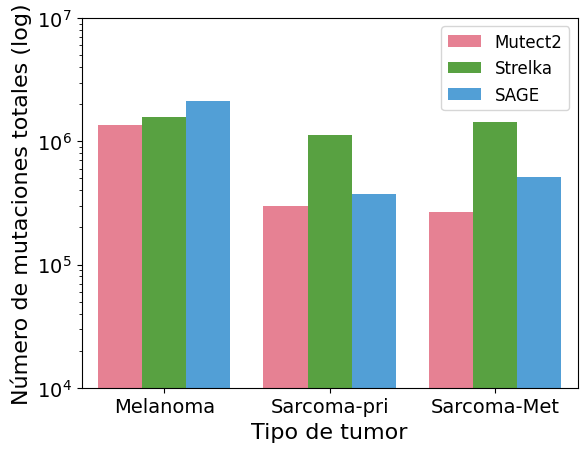

In [15]:
## FOR RAW DATA
# Make a dataframe to represent data
mut_df1 = {
    'Tipo de tumor': ['Melanoma', 'Melanoma', 'Melanoma', 'Sarcoma-pri', 'Sarcoma-pri', 'Sarcoma-pri', 'Sarcoma-Met', 'Sarcoma-Met', 'Sarcoma-Met'],
    'Número de mutaciones': [mel_mutect_raw, mel_strelka_raw, mel_sage_raw, sar_mutect_raw, sar_strelka_raw, sar_sage_raw, l_mutect_raw, l_strelka_raw, l_sage_raw],
    'Herramienta': ['Mutect2', 'Strelka', 'SAGE', 'Mutect2', 'Strelka', 'SAGE', 'Mutect2', 'Strelka', 'SAGE']
}

mut_df1 = pd.DataFrame(mut_df1)
ax = sns.barplot(x='Tipo de tumor', y='Número de mutaciones', hue='Herramienta', data=mut_df1, palette = sns.color_palette("husl", 3))

# Set the scale to log for better visualization
ax.set_yscale('log')

# Set labels and title
ax.set_xlabel('Tipo de tumor', fontsize=16)
ax.set_ylabel('Número de mutaciones totales (log)', fontsize=16)
# Set font size for ticks
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)  
ax.legend(fontsize=12)
ax.set_ylim(1e4, 1e7)

plt.savefig('/workspace/projects/sjd_melos/exports_images/caller_comparison_raw.png', dpi=300, transparent=True, format='png', bbox_inches='tight')

# Show the plot
plt.show()

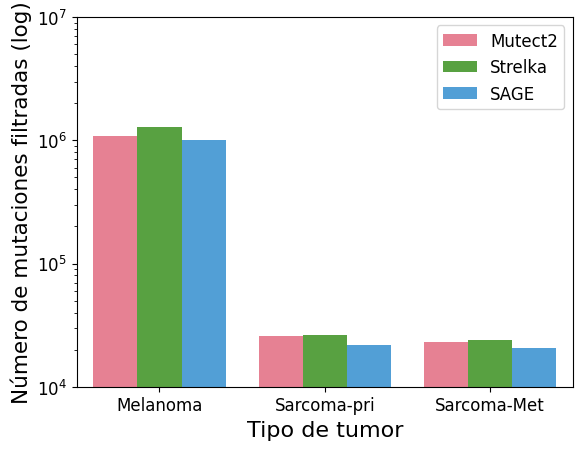

In [16]:
## FOR FILTERED DATA
# Make a dataframe to represent data
mut_df2 = {
    'Tipo de tumor': ['Melanoma', 'Melanoma', 'Melanoma', 'Sarcoma-pri', 'Sarcoma-pri', 'Sarcoma-pri', 'Sarcoma-Met', 'Sarcoma-Met', 'Sarcoma-Met'],
    'Log Número de mutaciones': [mel_mutect, mel_strelka, mel_sage, sar_mutect, sar_strelka, sar_sage, lung_mutect, lung_strelka, lung_sage],
    'Herramienta': ['Mutect2', 'Strelka', 'SAGE', 'Mutect2', 'Strelka', 'SAGE', 'Mutect2', 'Strelka', 'SAGE']
}

mut_df2 = pd.DataFrame(mut_df2)
ax2 = sns.barplot(x='Tipo de tumor', y='Log Número de mutaciones', hue='Herramienta', data=mut_df2, palette=sns.color_palette("husl", 3))

# Set the scale to log for better visualization
ax2.set_yscale('log')

# Set labels and title

ax2.set_xlabel('Tipo de tumor', fontsize=16)
ax2.set_ylabel('Número de mutaciones filtradas (log)', fontsize=15.5)
# Set font size for ticks
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)  
ax2.legend(fontsize=12)
ax2.set_ylim(1e4, 1e7)

plt.savefig('/workspace/projects/sjd_melos/exports_images/caller_comparison.png', dpi=300, transparent=True, format='png', bbox_inches='tight')

# Show the plot
plt.show()

## b) Caller comparison considering SNPs and INDEL mutations in consensus mutation list

In [17]:
from tqdm.notebook import tqdm
from tqdm import tqdm_notebook
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [18]:
# Import list of the list of consensus mutations in a minimum of 2 of the 3 callers in each sample
mel_mut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_List_common_mutations_callers.tsv.gz', sep="\t", header=0)
sar_mut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_List_common_mutations_callers.tsv.gz', sep="\t", header=0)
lung_mut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_List_common_mutations_callers.tsv.gz', sep="\t", header=0)

In [19]:
display(mel_mut_df.head())
display(sar_mut_df.head())
display(lung_mut_df.head())

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut
0,chr1,59074,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=48,39|5,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:69,0:0.014:69:25,0:38,0:67,0:36,33,0,0",...,69,11,0,18,69,0.379310,SNV,Mutect_Strelka,melanoma,chr1_59074_C_T
1,chr1,60739,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=46,55|4,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:65,0:0.015:65:32,0:30,0:65,0:28,37,0,0",...,65,10,0,36,65,0.217391,SNV,Mutect_Strelka,melanoma,chr1_60739_G_A
2,chr1,86292,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=75,106|6,4;DP...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:106,0:9.164e-03:106:46,0:41,0:106,0:43,63,0,0",...,106,10,0,75,106,0.117647,SNV,Mutect_Strelka,melanoma,chr1_86292_C_T
3,chr1,108632,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=134,78|7,6;DP...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:153,0:6.495e-03:153:74,0:73,0:151,0:104,49...",...,153,13,0,59,153,0.180556,SNV,Mutect_Strelka,melanoma,chr1_108632_C_T
4,chr1,115638,.,G,A,251,PASS,LPS=4;LPS_RC=22;RC=CAAGT;RC_IDX=2;RC_LF=AAAGTG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:155,0:0:155:4877,0:159,0:0,0,0,0,0,155,1...",...,155,22,0,134,155,0.140000,SNV,Strelka_SAGE,melanoma,chr1_115638_G_A


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut
0,chr1,104188,.,C,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=36,157|24,22;...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:124,0:7.128e-03:124:33,0:29,0:125,0:0|1:10...",...,124,46,0,69,124,0.400000,SNV,Mutect_Strelka,sarcoma,chr1_104188_C_A
1,chr1,843320,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=105,87|38,31;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:126,0:7.857e-03:126:58,0:63,0:125,0:67,59,0,0",...,126,69,0,66,126,0.511111,SNV,Mutect_Strelka,sarcoma,chr1_843320_G_A
2,chr1,1014876,.,G,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=162,109|4,2;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:141,0:7.025e-03:141:64,0:69,0:139,0:85,56,0,0",...,141,6,0,130,141,0.044118,SNV,Mutect_Strelka,sarcoma,chr1_1014876_G_T
3,chr1,1118520,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=120,130|19,26...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:153,0:6.470e-03:153:62,0:83,0:152,0:78,75,0,0",...,153,45,0,97,153,0.316901,SNV,Mutect_Strelka,sarcoma,chr1_1118520_C_T
4,chr1,1136548,.,G,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=86,92|45,45;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:123,0:8.107e-03:123:60,0:59,0:121,0:57,66,0,0",...,123,90,0,55,123,0.620690,SNV,Mutect_Strelka,sarcoma,chr1_1136548_G_T


,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut
0,chr1,104188,.,C,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=40,144|18,33;...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:124,0:7.177e-03:124:33,0:29,0:124,0:0|1:10...",...,124,51,0,60,124,0.459459,SNV,Mutect_Strelka,sarcoma_lung,chr1_104188_C_A
1,chr1,843320,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=81,70|44,36;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:126,0:7.857e-03:126:58,0:63,0:125,0:67,59,0,0",...,126,80,0,25,126,0.761905,SNV,Mutect_Strelka,sarcoma_lung,chr1_843320_G_A
2,chr1,1118520,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=114,133|12,30...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:153,0:6.470e-03:153:62,0:83,0:152,0:78,75,0,0",...,153,42,0,94,153,0.308824,SNV,Mutect_Strelka,sarcoma_lung,chr1_1118520_C_T
3,chr1,1136548,.,G,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=72,93|44,38;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:123,0:8.107e-03:123:60,0:59,0:121,0:57,66,0,0",...,123,82,0,42,123,0.661290,SNV,Mutect_Strelka,sarcoma_lung,chr1_1136548_G_T
4,chr1,1182738,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=126,126|27,25...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:167,0:5.950e-03:167:85,0:68,0:165,0:84,83,0,0",...,167,52,0,85,167,0.379562,SNV,Mutect_Strelka,sarcoma_lung,chr1_1182738_C_T


In [20]:
def muttype_new(row):
    # Infer mutation type
    if row['mut_type'] == 'MNV':
        if len(row['ALT']) == len(row['REF']) and len(row['REF'])  > 1 <= 2:
            return 'DNV'
        elif len(row['ALT']) == len(row['REF']) and len(row['REF']) > 2:
            return 'MNV'
        else:
            return 'SNV'
    elif row['mut_type'] == 'INDEL': 
        return 'INDEL'
    elif row['mut_type'] == 'SNV':
        return 'SNV'
    else:
        print(row)

In [21]:
mel_mut_df['new_mut_type'] = mel_mut_df.progress_apply(muttype_new, axis=1)
sar_mut_df['new_mut_type'] = sar_mut_df.progress_apply(muttype_new, axis=1)
lung_mut_df['new_mut_type'] = lung_mut_df.progress_apply(muttype_new, axis=1)

  0%|          | 0/1062273 [00:00<?, ?it/s]

  0%|          | 0/24295 [00:00<?, ?it/s]

  0%|          | 0/22125 [00:00<?, ?it/s]

In [22]:
# For melanoma sample
m_mnv = len(mel_mut_df[mel_mut_df['new_mut_type']=='MNV'])
m_snv = len(mel_mut_df[mel_mut_df['new_mut_type']=='SNV'])
m_dnv = len(mel_mut_df[mel_mut_df['new_mut_type']=='DNV'])
m_indel = len(mel_mut_df[mel_mut_df['new_mut_type']=='INDEL'])
print(m_mnv)
print(m_snv)
print(m_dnv)
print(m_indel)

0
866170
193301
2802


In [23]:
# For sarcoma sample
s_mnv = len(sar_mut_df[sar_mut_df['new_mut_type']=='MNV'])
s_snv = len(sar_mut_df[sar_mut_df['new_mut_type']=='SNV'])
s_dnv = len(sar_mut_df[sar_mut_df['new_mut_type']=='DNV'])
s_indel = len(sar_mut_df[sar_mut_df['new_mut_type']=='INDEL'])
print(s_mnv)
print(s_snv)
print(s_dnv)
print(s_indel)

0
23231
113
951


In [24]:
# For lung sample
l_mnv = len(lung_mut_df[lung_mut_df['new_mut_type']=='MNV'])
l_snv = len(lung_mut_df[lung_mut_df['new_mut_type']=='SNV'])
l_dnv = len(lung_mut_df[lung_mut_df['new_mut_type']=='DNV'])
l_indel = len(lung_mut_df[lung_mut_df['new_mut_type']=='INDEL'])
print(l_mnv)
print(l_snv)
print(l_dnv)
print(l_indel)

0
21111
99
915


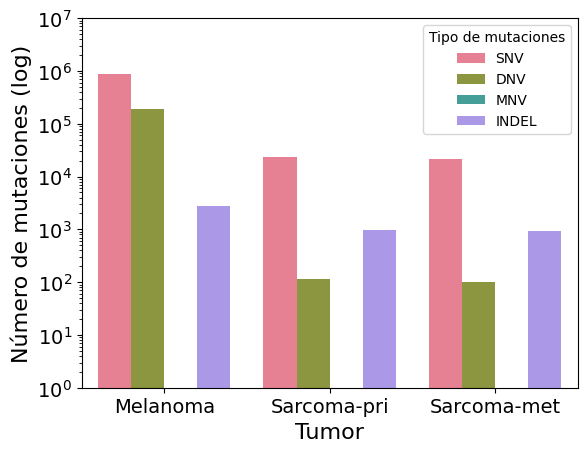

In [25]:
# Make a dataframe to represent data
mut_type = {
    'Tumor': ['Melanoma', 'Melanoma', 'Melanoma', 'Melanoma', 'Sarcoma-pri', 'Sarcoma-pri', 'Sarcoma-pri', 'Sarcoma-pri', 'Sarcoma-met', 'Sarcoma-met', 'Sarcoma-met', 'Sarcoma-met'],
    'Number of mutations (log)': [m_snv, m_dnv, m_mnv, m_indel, s_snv, s_dnv, s_mnv, s_indel, l_snv, l_dnv, l_mnv, l_indel],
    'Tipo de mutaciones': ['SNV', 'DNV', 'MNV', 'INDEL', 'SNV', 'DNV', 'MNV', 'INDEL', 'SNV', 'DNV', 'MNV', 'INDEL' ]
}

mut_type = pd.DataFrame(mut_type)
ax3 = sns.barplot(x='Tumor', y='Number of mutations (log)', hue='Tipo de mutaciones', data=mut_type, palette=sns.color_palette("husl", 4))

# Set the scale to log for better visualization (base 10)
ax3.set_yscale('log')

# Set labels and title with fontsize
ax3.set_xlabel('Tumor', fontsize=16)
ax3.set_ylabel('Número de mutaciones (log)', fontsize=16)
plt.ylim([1,10e6])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Show the plot
plt.savefig('/workspace/projects/sjd_melos/exports_images/tipo_mutaciones.png',dpi=300,transparent=True, format='png', bbox_inches='tight')
plt.show()

## c) Compare the number of mutations with Intogen data from Hartwig (adjults) and StJude (children)

In [26]:
# Import tables from intOGen data (https://www.intogen.org/search ; release v2023.05.31):

# From the Hartwig adult cohort import WGS data from melanoma and sarcoma samples (SKCM, SARCNOS and SOFT_TISSUE, respectively):
hartwig_mel = pd.read_csv('/workspace/datasets/intogen/runs/v2024/20240409_ALL/steps/inputs/HARTWIG_WGS_SKCM_2023.parsed.tsv.gz', sep="\t", header=0)
hartwig_sarnos = pd.read_csv('/workspace/datasets/intogen/runs/v2024/20240409_ALL/steps/inputs/HARTWIG_WGS_SARCNOS_2023.parsed.tsv.gz', sep="\t", header=0)
hartwig_sarsoft = pd.read_csv('/workspace/datasets/intogen/runs/v2024/20240409_ALL/steps/inputs/HARTWIG_WGS_SOFT_TISSUE_2023.parsed.tsv.gz', sep="\t", header=0)

display(hartwig_mel.head())
display(hartwig_sarnos.head())
display(hartwig_sarsoft.head())

# From the St Jude pediatric cohort import WGS data from sarcomas (D_OS, M_OS). Note there is no pediatric data for melanoma:
stj_os_d = pd.read_csv('/workspace/datasets/intogen/runs/v2024/20240409_ALL/steps/inputs/STJUDE_WGS_D_OS_2018.parsed.tsv.gz', sep="\t", header=0)
stj_os_m = pd.read_csv('/workspace/datasets/intogen/runs/v2024/20240409_ALL/steps/inputs/STJUDE_WGS_M_OS_2018.parsed.tsv.gz', sep="\t", header=0)

display(stj_os_d.head())
display(stj_os_m.head())

/tmp/jobs/efiguerola/9960593/ipykernel_893442/3743813126.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hartwig_mel = pd.read_csv('/workspace/datasets/intogen/runs/v2024/20240409_ALL/steps/inputs/HARTWIG_WGS_SKCM_2023.parsed.tsv.gz', sep="\t", header=0)
/tmp/jobs/efiguerola/9960593/ipykernel_893442/3743813126.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hartwig_sarsoft = pd.read_csv('/workspace/datasets/intogen/runs/v2024/20240409_ALL/steps/inputs/HARTWIG_WGS_SOFT_TISSUE_2023.parsed.tsv.gz', sep="\t", header=0)


,SAMPLE,DONOR,CHROMOSOME,POSITION,REF,ALT,STRAND,ALT_TYPE,PLATFORM,GENOMEREF,CANCER,DATASET
0,COREDB011216T,HMF006709,1,79073,C,T,+,snv,WGS,hg19,SKCM,HARTWIG_WGS_SKCM_2023
1,COREDB011216T,HMF006709,1,541116,G,A,+,snv,WGS,hg19,SKCM,HARTWIG_WGS_SKCM_2023
2,COREDB011216T,HMF006709,1,675721,G,A,+,snv,WGS,hg19,SKCM,HARTWIG_WGS_SKCM_2023
3,COREDB011216T,HMF006709,1,797619,C,T,+,snv,WGS,hg19,SKCM,HARTWIG_WGS_SKCM_2023
4,COREDB011216T,HMF006709,1,908488,G,A,+,snv,WGS,hg19,SKCM,HARTWIG_WGS_SKCM_2023


,SAMPLE,DONOR,CHROMOSOME,POSITION,REF,ALT,STRAND,ALT_TYPE,PLATFORM,GENOMEREF,CANCER,DATASET
0,CORE01130008T,HMF006095,1,2710096,A,G,+,snv,WGS,hg19,SARCNOS,HARTWIG_WGS_SARCNOS_2023
1,CORE01130008T,HMF006095,1,2983996,C,A,+,snv,WGS,hg19,SARCNOS,HARTWIG_WGS_SARCNOS_2023
2,CORE01130008T,HMF006095,1,4083633,G,A,+,snv,WGS,hg19,SARCNOS,HARTWIG_WGS_SARCNOS_2023
3,CORE01130008T,HMF006095,1,4789981,G,T,+,snv,WGS,hg19,SARCNOS,HARTWIG_WGS_SARCNOS_2023
4,CORE01130008T,HMF006095,1,4810649,C,T,+,snv,WGS,hg19,SARCNOS,HARTWIG_WGS_SARCNOS_2023


,SAMPLE,DONOR,CHROMOSOME,POSITION,REF,ALT,STRAND,ALT_TYPE,PLATFORM,GENOMEREF,CANCER,DATASET
0,ACTN01020117T,HMF006223,1,1140807,A,G,+,snv,WGS,hg19,SOFT_TISSUE,HARTWIG_WGS_SOFT_TISSUE_2023
1,ACTN01020117T,HMF006223,1,1422020,T,C,+,snv,WGS,hg19,SOFT_TISSUE,HARTWIG_WGS_SOFT_TISSUE_2023
2,ACTN01020117T,HMF006223,1,2055906,G,A,+,snv,WGS,hg19,SOFT_TISSUE,HARTWIG_WGS_SOFT_TISSUE_2023
3,ACTN01020117T,HMF006223,1,2086593,T,C,+,snv,WGS,hg19,SOFT_TISSUE,HARTWIG_WGS_SOFT_TISSUE_2023
4,ACTN01020117T,HMF006223,1,2789745,G,T,+,snv,WGS,hg19,SOFT_TISSUE,HARTWIG_WGS_SOFT_TISSUE_2023


,SAMPLE,DONOR,CHROMOSOME,POSITION,REF,ALT,STRAND,ALT_TYPE,PLATFORM,GENOMEREF,CANCER
0,SJOS001103_D1,SJOS001103,1,2424088,G,T,+,snv,WGS,hg19,OS
1,SJOS001103_D1,SJOS001103,1,4041713,G,A,+,snv,WGS,hg19,OS
2,SJOS001103_D1,SJOS001103,1,4229080,G,T,+,snv,WGS,hg19,OS
3,SJOS001103_D1,SJOS001103,1,4568028,C,T,+,snv,WGS,hg19,OS
4,SJOS001103_D1,SJOS001103,1,6831262,C,G,+,snv,WGS,hg19,OS


,SAMPLE,DONOR,CHROMOSOME,POSITION,REF,ALT,STRAND,ALT_TYPE,PLATFORM,GENOMEREF,CANCER
0,SJOS001101_M1,SJOS001101,1,18429490,C,T,+,snv,WGS,hg19,OS
1,SJOS001101_M1,SJOS001101,1,38509986,A,G,+,snv,WGS,hg19,OS
2,SJOS001101_M1,SJOS001101,1,43559265,G,T,+,snv,WGS,hg19,OS
3,SJOS001101_M1,SJOS001101,1,50655297,G,A,+,snv,WGS,hg19,OS
4,SJOS001101_M1,SJOS001101,1,50881904,C,T,+,snv,WGS,hg19,OS


In [27]:
h_mel_donor = hartwig_mel.groupby(hartwig_mel['DONOR']).count()
h_sarnos_donor = hartwig_sarnos.groupby(hartwig_sarnos['DONOR']).count()
h_sarsoft_donor = hartwig_sarsoft.groupby(hartwig_sarsoft['DONOR']).count()

stj_osd_donor = stj_os_d.groupby(stj_os_d['DONOR']).count()
stj_osm_donor = stj_os_m.groupby(stj_os_m['DONOR']).count()

In [28]:
display(h_mel_donor.head())
display(h_sarnos_donor.head())
display(h_sarsoft_donor.head())

display(stj_osd_donor.head())
display(stj_osm_donor.head())

,SAMPLE,CHROMOSOME,POSITION,REF,ALT,STRAND,ALT_TYPE,PLATFORM,GENOMEREF,CANCER,DATASET
DONOR,,,,,,,,,,,
HMF000004,44400,44400,44400,44400,44400,44400,44400,44400,44400,44400,44400
HMF000027,46875,46875,46875,46875,46875,46875,46875,46875,46875,46875,46875
HMF000030,26738,26738,26738,26738,26738,26738,26738,26738,26738,26738,26738
HMF000076,8918,8918,8918,8918,8918,8918,8918,8918,8918,8918,8918
HMF000078,34661,34661,34661,34661,34661,34661,34661,34661,34661,34661,34661


,SAMPLE,CHROMOSOME,POSITION,REF,ALT,STRAND,ALT_TYPE,PLATFORM,GENOMEREF,CANCER,DATASET
DONOR,,,,,,,,,,,
HMF000012,2616,2616,2616,2616,2616,2616,2616,2616,2616,2616,2616
HMF000013,2338,2338,2338,2338,2338,2338,2338,2338,2338,2338,2338
HMF000110,11566,11566,11566,11566,11566,11566,11566,11566,11566,11566,11566
HMF000200,7474,7474,7474,7474,7474,7474,7474,7474,7474,7474,7474
HMF000301,4054,4054,4054,4054,4054,4054,4054,4054,4054,4054,4054


,SAMPLE,CHROMOSOME,POSITION,REF,ALT,STRAND,ALT_TYPE,PLATFORM,GENOMEREF,CANCER,DATASET
DONOR,,,,,,,,,,,
HMF000099,3004,3004,3004,3004,3004,3004,3004,3004,3004,3004,3004
HMF000124,2787,2787,2787,2787,2787,2787,2787,2787,2787,2787,2787
HMF000712,969,969,969,969,969,969,969,969,969,969,969
HMF000795,4025,4025,4025,4025,4025,4025,4025,4025,4025,4025,4025
HMF000825,6742,6742,6742,6742,6742,6742,6742,6742,6742,6742,6742


,SAMPLE,CHROMOSOME,POSITION,REF,ALT,STRAND,ALT_TYPE,PLATFORM,GENOMEREF,CANCER
DONOR,,,,,,,,,,
SJOS001103,1399,1399,1399,1399,1399,1399,1399,1399,1399,1399
SJOS001105,1477,1477,1477,1477,1477,1477,1477,1477,1477,1477
SJOS001106,1543,1543,1543,1543,1543,1543,1543,1543,1543,1543
SJOS001117,1090,1090,1090,1090,1090,1090,1090,1090,1090,1090
SJOS001118,746,746,746,746,746,746,746,746,746,746


,SAMPLE,CHROMOSOME,POSITION,REF,ALT,STRAND,ALT_TYPE,PLATFORM,GENOMEREF,CANCER
DONOR,,,,,,,,,,
SJOS001,2574,2574,2574,2574,2574,2574,2574,2574,2574,2574
SJOS001101,19989,19989,19989,19989,19989,19989,19989,19989,19989,19989
SJOS001107,4049,4049,4049,4049,4049,4049,4049,4049,4049,4049
SJOS001112,5650,5650,5650,5650,5650,5650,5650,5650,5650,5650
SJOS010,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238


In [29]:
print(len(h_mel_donor))
print(len(h_sarnos_donor))
print(len(h_sarsoft_donor))

299
50
58


In [30]:
h_mel_mut = pd.DataFrame(h_mel_donor['CHROMOSOME'])
h_sarnos_mut = pd.DataFrame(h_sarnos_donor['CHROMOSOME'])
h_sarsoft_mut = pd.DataFrame(h_sarsoft_donor['CHROMOSOME'])

sjd_osd_mut = pd.DataFrame(stj_osd_donor['CHROMOSOME'])
sjd_osm_mut = pd.DataFrame(stj_osm_donor['CHROMOSOME'])

In [31]:
# Add column to identify samples prior to concat
h_mel_mut['tumor_id'] = 'Melanoma \n n=299'
h_sarnos_mut['tumor_id'] = 'Sarcoma \n adulto \n n=108'
h_sarsoft_mut['tumor_id'] = 'Sarcoma \n adulto \n n=108'

sjd_osd_mut['tumor_id'] = 'Sarcoma \n pediátrico \n primario \n n=30'
sjd_osm_mut['tumor_id'] = 'Sarcoma \n pediátrico \n metástasis \n n=15'

In [32]:
all_df = pd.concat([h_mel_mut, h_sarnos_mut, h_sarsoft_mut])

os_df = pd.concat([sjd_osd_mut, sjd_osm_mut])

In [33]:
display(all_df.head())
display(os_df.head())

,CHROMOSOME,tumor_id
DONOR,,
HMF000004,44400,Melanoma \n n=299
HMF000027,46875,Melanoma \n n=299
HMF000030,26738,Melanoma \n n=299
HMF000076,8918,Melanoma \n n=299
HMF000078,34661,Melanoma \n n=299


,CHROMOSOME,tumor_id
DONOR,,
SJOS001103,1399,Sarcoma \n pediátrico \n primario \n n=30
SJOS001105,1477,Sarcoma \n pediátrico \n primario \n n=30
SJOS001106,1543,Sarcoma \n pediátrico \n primario \n n=30
SJOS001117,1090,Sarcoma \n pediátrico \n primario \n n=30
SJOS001118,746,Sarcoma \n pediátrico \n primario \n n=30


In [34]:
together_df = pd.concat([all_df, os_df])
together_df

,CHROMOSOME,tumor_id
DONOR,,
HMF000004,44400,Melanoma \n n=299
HMF000027,46875,Melanoma \n n=299
HMF000030,26738,Melanoma \n n=299
HMF000076,8918,Melanoma \n n=299
HMF000078,34661,Melanoma \n n=299
...,...,...
SJOS001101,19989,Sarcoma \n pediátrico \n metástasis \n n=15
SJOS001107,4049,Sarcoma \n pediátrico \n metástasis \n n=15
SJOS001112,5650,Sarcoma \n pediátrico \n metástasis \n n=15


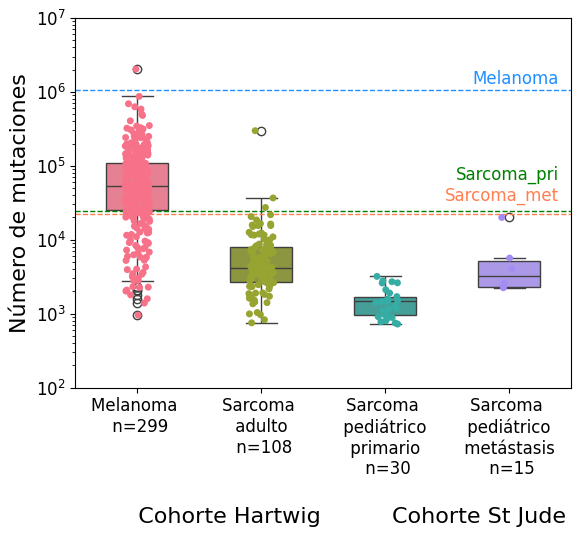

In [35]:
sns.boxplot(data=together_df, x="tumor_id", y="CHROMOSOME", hue='tumor_id', log_scale=True, palette=sns.color_palette("husl", 4), width=.5)
plt.xlabel('\n          Cohorte Hartwig          Cohorte St Jude  ', fontsize= 16)
plt.ylabel('Número de mutaciones', fontsize= 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([10e1,10e6])
plt.axhline(y=1062273, color='dodgerblue', linestyle='--', linewidth=1)
plt.axhline(y=24295, color='green', linestyle='--', linewidth=1)
plt.axhline(y=22125, color='coral', linestyle='--', linewidth=1)
plt.text(3.4, 1062273 + 200000, 'Melanoma', ha='right', fontsize=12, color='dodgerblue')
plt.text(3.4, 24295 + 10000, 'Sarcoma_met', ha='right', fontsize=12, color='coral')
plt.text(3.4, 24295 + 40000, 'Sarcoma_pri', ha='right', fontsize=12, color='green')
sns.stripplot(data=together_df, x="tumor_id", y="CHROMOSOME", hue='tumor_id', log_scale=False, palette=sns.color_palette("husl", 4))
plt.savefig('/workspace/projects/sjd_melos/exports_images/cohortes.png',dpi=300,transparent=True, format='png', bbox_inches='tight')
plt.show()